![Day 6](https://github.com/MachineLearning100/100-Days-Of-ML-Code/raw/master/Info-graphs/Day%204.jpg)

## 数据集: 社交网络  

![Dateset](https://github.com/MachineLearning100/100-Days-Of-ML-Code/raw/master/Other%20Docs/data.png)
  
该数据集包含了社交网络中用户的信息。这些信息涉及用户ID，性别，年龄以及预估薪资。一家汽车公司刚刚推出了他们新型的豪华SUV，我们尝试预测哪些用户会购买这种全新SUV。并且在最后一列用来表示用户是否购买（0: 否，1: 是）。我们将建立一种模型来预测用户是否购买这种SUV，该模型基于两个变量，分别是 **年龄** 和 **预计薪资** 。因此我们的特征矩阵将是这两列。我们尝试寻找用户年龄与预估薪资之间的某种相关性，以及他是否购买SUV的决定。

## 标准化数据
```
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
```
在训练模型的时候，要输入features。对于同一个特征，不同的样本中的取值可能会相差非常大，一些异常小或异常大的数据会误导模型的正确训练；另外，如果数据的分布很分散也会影响训练结果。以上两种方式都体现在方差会非常大。此时，我们可以将特征中的值进行标准差标准化，即转换为均值为0，方差为1的正态分布。所以在训练模型之前，一定要对特征的数据分布进行探索，并考虑是否有必要将数据进行标准化。

## Step 1: 数据预处理

In [3]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据集
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

# 将数据集分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# 特征缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/jia/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Step 2: 逻辑回归模型
该项工作的库将会是一个线性模型库，之所以被称为线性是因为逻辑回归是一个线性分类器，这意味着我们在二维空间中，我们两类用户（购买和不购买）将被一条直线分割。然后导入逻辑回归类。这一步我们将创建该类的对象，它将作为我们训练集的分类器。

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Step 3: 预测

In [13]:
# 预测测试集结果
y_pred = classifier.predict(X_test)

# 分类效果评估
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.89


## Step 4: 评估测试结果
现在我们将评估逻辑回归模型是否正确的学习和理解。这个混淆矩阵将包含我们模型的正确和错误的预测。

In [7]:
# 生成混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


numpy中的ravel()、flatten()、squeeze()都有将多维数组转换为一维数组的功能，区别： 
* ravel()：如果没有必要，不会产生源数据的副本 
* flatten()：返回源数据的副本 
* squeeze()：只能对维数为1的维度降维
另外，reshape(-1)也可以“拉平”多维数组

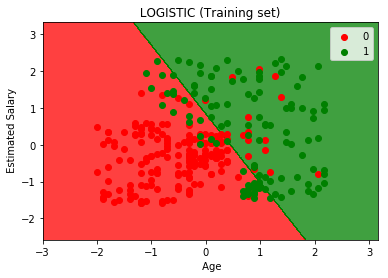

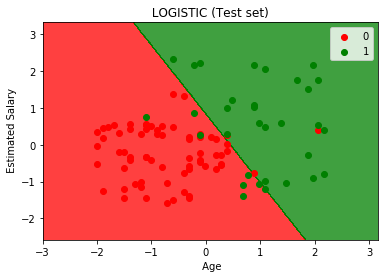

In [10]:
# 可视化训练集
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC (Training set) ')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

# 可视化测试集
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01),
                    np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC (Test set) ')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()